In [1]:
import sys
sys.path.append('../')

import numpy as np



import os
import matplotlib
import matplotlib.pyplot as plt


import cv2

from scipy import ndimage, fft

import pandas as pd

import scienceplots

plt.style.use(['science', 'ieee'])
plt.rcParams.update({'figure.dpi': '1000'})

c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('wandb_export_resnet.csv')

print(df.to_string()) 

   Step  resnet50_6_seed=99 - initial_val_accuracy  resnet50_6_seed=99 - initial_val_accuracy__MIN  resnet50_6_seed=99 - initial_val_accuracy__MAX  resnet50_6_seed=99 - val_accuracy  resnet50_6_seed=99 - val_accuracy__MIN  resnet50_6_seed=99 - val_accuracy__MAX  resnet50_5_seed=99 - initial_val_accuracy  resnet50_5_seed=99 - initial_val_accuracy__MIN  resnet50_5_seed=99 - initial_val_accuracy__MAX  resnet50_5_seed=99 - val_accuracy  resnet50_5_seed=99 - val_accuracy__MIN  resnet50_5_seed=99 - val_accuracy__MAX  resnet50_4_seed=99 - initial_val_accuracy  resnet50_4_seed=99 - initial_val_accuracy__MIN  resnet50_4_seed=99 - initial_val_accuracy__MAX  resnet50_4_seed=99 - val_accuracy  resnet50_4_seed=99 - val_accuracy__MIN  resnet50_4_seed=99 - val_accuracy__MAX  resnet50_2_seed=99 - initial_val_accuracy  resnet50_2_seed=99 - initial_val_accuracy__MIN  resnet50_2_seed=99 - initial_val_accuracy__MAX  resnet50_2_seed=99 - val_accuracy  resnet50_2_seed=99 - val_accuracy__MIN  resnet50_2_seed

In [3]:
results = {}
for i in range(1,7):	
    
	results[i] = []
	results[i].append(df[f'resnet50_{i}_seed=99 - initial_val_accuracy'][0])
	results[i].extend(df[f'resnet50_{i}_seed=99 - val_accuracy__MAX'][1:].values)

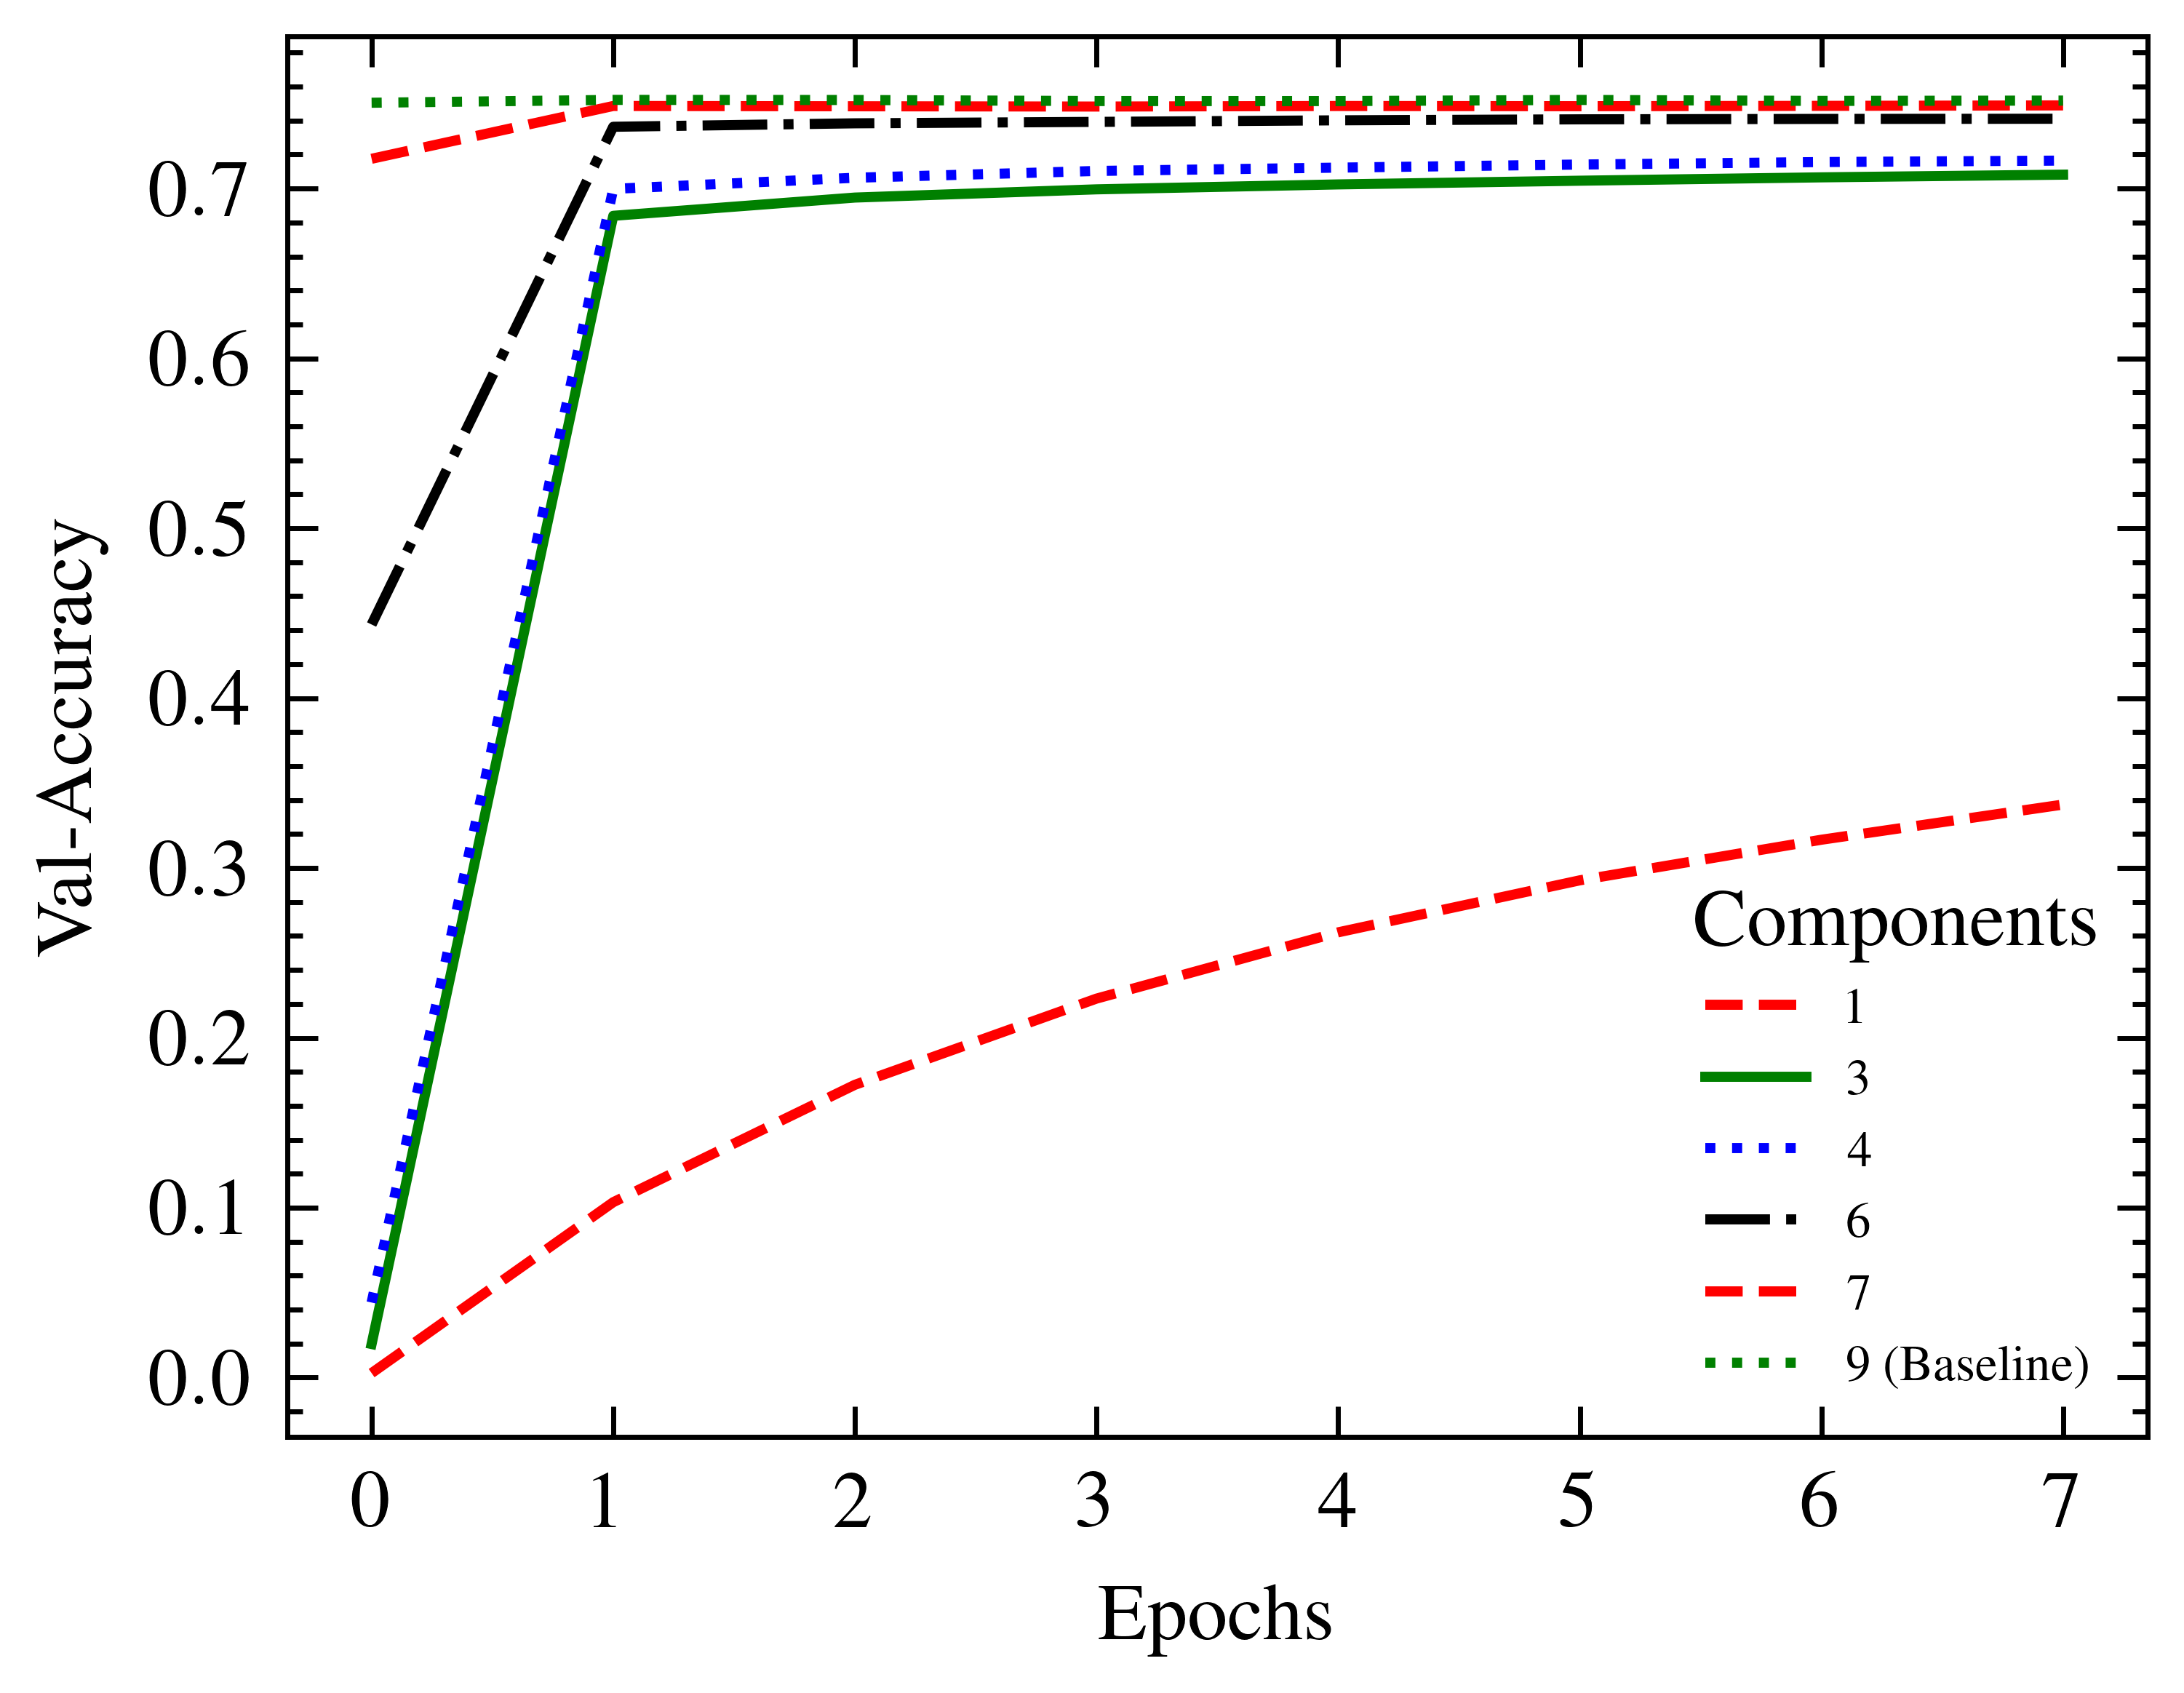

In [4]:
from cycler import cycler

plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'k', 'r', 'g']) +
                           cycler('linestyle', ['--', '-', ':', '-.',  '--', ':'])))

xs = range(0, len(results[1]))
markers = ['.', 'v', '^', '<', '>', 's']
f = plt.figure(0) 
for k, v in results.items():  
    ys = v
    plt.plot(xs, ys, label=k, linewidth=1.)

plt.legend(title="Components", labels=['1','3','4','6','7','9 (Baseline)'], facecolor="white", prop = { "size": 5 })
plt.ylabel("Val-Accuracy")
plt.xticks(range(0,len(results[1])))
plt.yticks(np.linspace(0.,0.7, 8))

plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='minor', top=False)

plt.xlabel("Epochs")

plt.show()

In [6]:
pd.DataFrame(results)

,1,2,3,4,5,6
0,0.002641,0.019766,0.044194,0.443342,0.717510,0.750500
1,0.103253,0.683939,0.699804,0.736356,0.748600,0.752181
2,0.172355,0.694682,0.706346,0.738396,0.748420,0.752121
3,0.223111,0.699524,0.710347,0.739237,0.748259,0.751500
4,0.262124,0.702425,0.712308,0.740157,0.748580,0.751480
5,0.292734,0.704605,0.714128,0.740737,0.748460,0.752161
6,0.316641,0.706586,0.715589,0.740977,0.748660,0.751580
7,0.337348,0.708167,0.716449,0.741077,0.748940,0.751781


In [5]:
f.savefig("resnet_dct.pdf", bbox_inches='tight')
